In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [7]:
# sns.heatmap(data.isna(),annot=True)
# plt.title("NULL VALUES ANY??")

In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

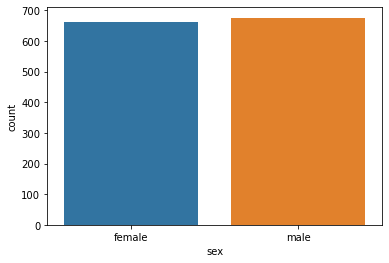

In [9]:
ax=sns.countplot(data["sex"])

In [10]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

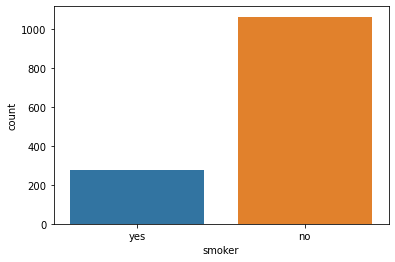

In [11]:
sns.countplot(data["smoker"])

In [12]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

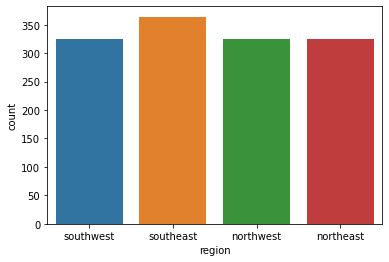

In [13]:
sns.countplot(data["region"])

In [14]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [52]:
data["sex"]=pd.get_dummies(data["sex"])
data["region"]=pd.get_dummies(data["region"])
data["smoker"]=pd.get_dummies(data["smoker"])

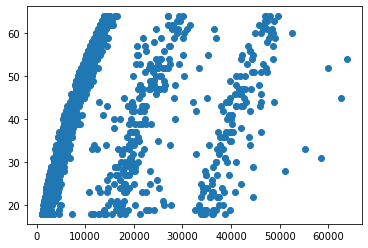

In [53]:
plt.scatter(data.expenses,data.age)

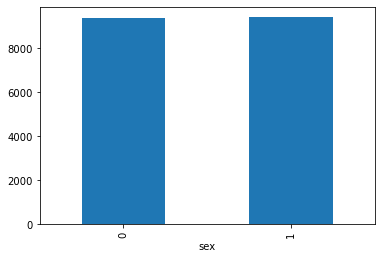

In [54]:
data.groupby("sex")['expenses'].median().plot.bar()
plt.show()

<AxesSubplot:xlabel='children'>

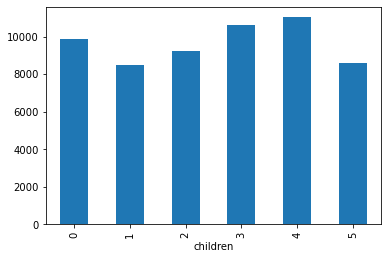

In [55]:
data.groupby("children")["expenses"].median().plot(kind="bar")

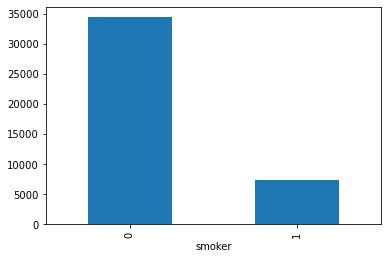

In [56]:
data.groupby("smoker")['expenses'].median().plot.bar()
plt.show()

In [57]:
data.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.020856,0.109341,0.042469,0.025019,0.002475,0.299008
sex,0.020856,1.000000,-0.046380,-0.017163,0.076185,0.002425,-0.057292
bmi,0.109341,-0.046380,1.000000,0.012645,-0.003968,-0.138091,0.198576
children,0.042469,-0.017163,0.012645,1.000000,-0.007673,-0.022808,0.067998
smoker,0.025019,0.076185,-0.003968,-0.007673,1.000000,-0.002811,-0.787251
region,0.002475,0.002425,-0.138091,-0.022808,-0.002811,1.000000,0.006349
expenses,0.299008,-0.057292,0.198576,0.067998,-0.787251,0.006349,1.000000


<AxesSubplot:>

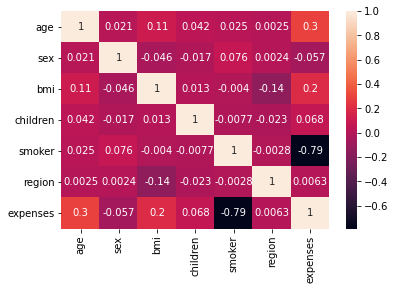

In [58]:
sns.heatmap(data.corr(),annot=True)

In [59]:
[cat for cat in data.columns if data[cat].dtype=="O"]

[]

In [60]:
[num for num in data.columns if data[num].dtype=="int64" or data[num].dtype=="float"]

['age', 'bmi', 'children', 'expenses']

In [61]:
num_feature=["age","bmi","children"]
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_feature=["sex","bmi","smoker"]
cat_transformer=OneHotEncoder(handle_unknown="ignore")
preprocessor=ColumnTransformer(transformers=[
        ( 'num',num_transformer,num_feature),
        ('cat', cat_transformer, cat_feature)])

In [62]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'bmi', 'smoker'])])

In [63]:
x=data.drop(["expenses"],axis=1)
y=data.expenses

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20)

In [65]:
x_train.shape,y_train.shape

((1070, 6), (1070,))

In [66]:
x_test.shape,y_test.shape

((268, 6), (268,))

In [69]:
models=[]
models.append(Pipeline(steps=[("preprocessor",preprocessor),("linear_regression",LinearRegression())]))
models.append(Pipeline(steps=[("preprocessor",preprocessor),("Decission_tree",DecisionTreeRegressor())]))
models.append(Pipeline(steps=[("preprocessor",preprocessor),("gradient_boost",GradientBoostingRegressor())]))
models.append(Pipeline(steps=[("preprocessor",preprocessor),("rf",RandomForestRegressor())]))

In [89]:
#to be fixed
def score(act,pred):
    r2score=r2_score(act,pred)
    mse=mean_squared_error(act,pred)
    rmse=np.sqrt(mean_squared_error(act,pred))
    return r2score,mse,rmse

results=[]
names=[]
rmse_score=[]
mse_score=[]
res=[]
for name,model in models:
    model=model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    (r2score,mse,rmse)=score(y_test,y_pred)
    res.append(r2score)                      
    names.append(name)
    mse_score.append(mse)
    rmse_score.append(rmse)
    print(" {}r2score  {}rmse  {}mse".format(res,rmse_score,mse_score))

 [0.7993476114410867]r2score  [5650.646614132986]rmse  [31929807.157812577]mse
 [0.7993476114410867, 0.7171273756636236]r2score  [5650.646614132986, 6709.210850097641]rmse  [31929807.157812577, 45013510.23106791]mse
 [0.7993476114410867, 0.7171273756636236, 0.8967039475894711]r2score  [5650.646614132986, 6709.210850097641, 4054.3183142520397]rmse  [31929807.157812577, 45013510.23106791, 16437496.9932795]mse
 [0.7993476114410867, 0.7171273756636236, 0.8967039475894711, 0.8729125904744702]r2score  [5650.646614132986, 6709.210850097641, 4054.3183142520397, 4497.045115360907]rmse  [31929807.157812577, 45013510.23106791, 16437496.9932795, 20223414.769591395]mse


In [90]:
gb_reg=Pipeline(steps=[("preprocessor",preprocessor),("GB",GradientBoostingRegressor())])

In [91]:
gb_reg.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'bmi', 'smoker'])])),
                ('GB', GradientBoostingRegressor())])

In [92]:
y_pred=gb_reg.predict(x_test)

In [93]:
(r2score,mse,rmse)=score(y_test,y_pred)

In [97]:
print(f"r2score:{r2score}\nmse:{mse}\nrmse:{rmse}")

r2score:0.8758750732747163
mse:19751994.991339322
rmse:4444.3216570517625


From the above observation we can say that the performance (RMSE & R-sqaured) of Gradient boosting model is good as compared to other models. So we will save Gradient boosting model for further testing of the data using pickle library.